In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline_tweets = pd.read_csv("C:\\Users\\Vinit Thakur\\Desktop\\barca.csv")

In [3]:
airline_tweets.head()

,Unnamed: 0,text,senti
0,1,MDLeading Trident\r\n\r\n Barapoints\r\n R Ma...,Neutral
1,2,Mourinho talking about how the only way to pla...,Positive
2,3,Barca after Pep\r\nst\r\nnd\r\nst\r\nst\r\nnd\...,Neutral
3,4,Messi for Barca\r\n\r\n games\r\n goals\r\n as...,Neutral
4,5,Welcome To Twitter where Man Utd Have Most Fan...,Positive


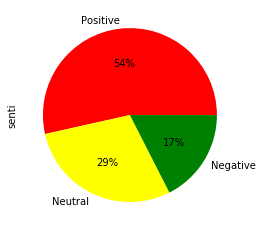

In [7]:
airline_tweets.senti.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [9]:
features = airline_tweets.iloc[:, 1].values
labels = airline_tweets.iloc[:, 2].values

In [12]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
predictions = text_classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 8  0  2]
 [ 0  7  1]
 [ 0  0 22]]
              precision    recall  f1-score   support

    Negative       1.00      0.80      0.89        10
     Neutral       1.00      0.88      0.93         8
    Positive       0.88      1.00      0.94        22

    accuracy                           0.93        40
   macro avg       0.96      0.89      0.92        40
weighted avg       0.93      0.93      0.92        40

0.925
